In [1]:
from keras.layers import *
from keras.models import Sequential

In [2]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [6]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [7]:
def preprocessing(X,Y):
    X = X.reshape((-1,28,28,1))
    X = X/255.0
    Y = to_categorical(Y)
    return X,Y

In [8]:
XTrain,YTrain = preprocessing(X_train,Y_train)
XTest,YTest = preprocessing(X_test,Y_test)

In [9]:
(X_train.shape,Y_train.shape),(X_test.shape,Y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [11]:
hist = model.fit(XTrain,YTrain,batch_size=64,epochs=20,validation_split=0.2, steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 13s 174ms/step - loss: 1.2679 - acc: 0.5906 - val_loss: 0.4466 - val_acc: 0.8719
Epoch 2/20
50/50 [==============================] - 7s 134ms/step - loss: 0.3603 - acc: 0.8881 - val_loss: 0.2587 - val_acc: 0.9221
Epoch 3/20
50/50 [==============================] - 5s 108ms/step - loss: 0.2532 - acc: 0.9219 - val_loss: 0.1773 - val_acc: 0.9482
Epoch 4/20
50/50 [==============================] - 5s 108ms/step - loss: 0.1716 - acc: 0.9484 - val_loss: 0.1837 - val_acc: 0.9449
Epoch 5/20
50/50 [==============================] - 5s 106ms/step - loss: 0.1748 - acc: 0.9484 - val_loss: 0.1244 - val_acc: 0.9643
Epoch 6/20
50/50 [==============================] - 5s 109ms/step - loss: 0.1334 - acc: 0.9575 - val_loss: 0.1202 - val_acc: 0.9651
Epoch 7/20
50/50 [==============================] - 5s 108ms/step - loss: 0.1335 - acc: 0.9591 - val_loss: 0.1133 - val_acc: 0.9672
Epoch 8/20
50/50 [==============================] - 5s 109ms/step - loss: 0

In [12]:
model.evaluate(XTest,YTest)

313/313 [==============================] - 2s 7ms/step - loss: 0.0463 - acc: 0.9853


[0.046278152614831924, 0.9853000044822693]

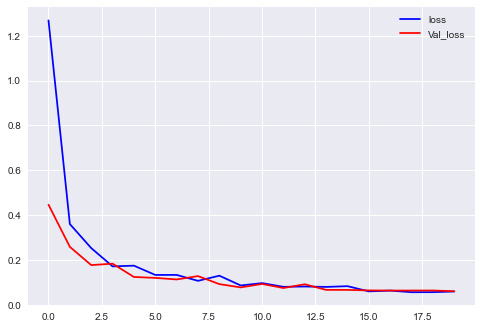

In [13]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(hist.history['loss'],label = 'loss',c='blue')
plt.plot(hist.history['val_loss'],label = 'Val_loss',c='red')
plt.legend()
plt.show()